In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
df = pd.read_csv("../data/Data_final.csv")

In [3]:
df.head()

,O_score,C_score,E_score,A_score,N_score,Numerical Aptitude,Spatial Aptitude,Perceptual Aptitude,Abstract Reasoning,Verbal Reasoning,Career
0,5.45,8.67,3.45,5.34,4.23,9.23,4.56,6.78,7.89,6.12,Accountant
1,8.78,5.67,4.56,6.45,4.23,5.12,8.45,7.89,6.34,6.01,Graphic Designer
2,6.12,6.78,9.34,7.56,5.01,6.23,4.23,6.45,6.67,8.45,Salesperson
3,9.12,8.78,4.23,5.67,4.56,7.89,5.34,6.45,9.34,7.67,Research Scientist
4,6.45,7.56,5.67,9.12,4.23,5.34,4.01,6.23,5.78,8.67,Teacher


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   O_score              105 non-null    float64
 1   C_score              105 non-null    float64
 2   E_score              105 non-null    float64
 3   A_score              105 non-null    float64
 4   N_score              105 non-null    float64
 5   Numerical Aptitude   105 non-null    float64
 6   Spatial Aptitude     105 non-null    float64
 7   Perceptual Aptitude  105 non-null    float64
 8   Abstract Reasoning   105 non-null    float64
 9   Verbal Reasoning     105 non-null    float64
 10  Career               105 non-null    object 
dtypes: float64(10), object(1)
memory usage: 9.2+ KB


In [5]:
df.describe(percentiles=[0, .25, .50, .75]).T.style.background_gradient(cmap='coolwarm')

,count,mean,std,min,0%,25%,50%,75%,max
O_score,105.000000,7.294857,1.398485,2.670000,2.670000,6.670000,7.230000,8.670000,9.450000
C_score,105.000000,7.538286,1.215005,3.560000,3.560000,7.340000,7.670000,8.340000,9.450000
E_score,105.000000,5.548952,1.643137,2.890000,2.890000,4.230000,5.230000,7.010000,9.340000
A_score,105.000000,6.863714,1.515778,3.230000,3.230000,5.450000,6.450000,8.120000,9.340000
N_score,105.000000,5.466381,0.868926,2.890000,2.890000,4.670000,5.450000,6.010000,8.120000
Numerical Aptitude,105.000000,5.939619,1.958362,2.890000,2.890000,4.450000,5.120000,7.780000,9.450000
Spatial Aptitude,105.000000,4.376476,1.948409,2.340000,2.340000,3.120000,3.450000,4.450000,9.230000
Perceptual Aptitude,105.000000,5.163810,1.747213,3.010000,3.010000,3.670000,4.450000,6.780000,9.340000
Abstract Reasoning,105.000000,5.724190,1.872927,3.010000,3.010000,4.340000,4.670000,7.670000,9.340000
Verbal Reasoning,105.000000,6.794381,1.495273,3.450000,3.450000,5.450000,7.450000,8.120000,9.340000


In [6]:
pd.DataFrame(df.isnull().sum()).T.style.background_gradient(cmap='coolwarm')

,O_score,C_score,E_score,A_score,N_score,Numerical Aptitude,Spatial Aptitude,Perceptual Aptitude,Abstract Reasoning,Verbal Reasoning,Career
0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
colunas_cat = df.select_dtypes(include=['object']).columns.to_list()
for col in df[colunas_cat]:
    print(f"\nColuna: {col}\n{df[col].value_counts()}")


Coluna: Career
Career
Environmental Scientist        2
Accountant                     1
Human Rights Lawyer            1
Investment Banker              1
Electrical Engineer            1
                              ..
Biotechnologist                1
Financial Planner              1
Social Worker                  1
Pharmacist                     1
Electronics Design Engineer    1
Name: count, Length: 104, dtype: int64


In [8]:
def contagem_outliers(df):
    colunas_num = df.select_dtypes(include=['int64', 'float64']).columns.to_list()
    outliers_count = {}
    for col in colunas_num:
        z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
        outliers = df[z_scores > 3]
        outliers_count[col] = len(outliers)
    return outliers_count

outliers_count = contagem_outliers(df)
print("Contagem de outliers utilizando Z-Score:")
for col, count in outliers_count.items():
    print(f"{col}: {count}")

Contagem de outliers utilizando Z-Score:
O_score: 2
C_score: 3
E_score: 0
A_score: 0
N_score: 1
Numerical Aptitude: 0
Spatial Aptitude: 0
Perceptual Aptitude: 0
Abstract Reasoning: 0
Verbal Reasoning: 0


In [9]:
colunas_num = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

print("\nQuantidade de outliers em cada coluna numérica utilizando Quartil:")
for col in colunas_num:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    print(f"{col}: {outliers.shape[0]}")


Quantidade de outliers em cada coluna numérica utilizando Quartil:
O_score: 2
C_score: 9
E_score: 0
A_score: 0
N_score: 1
Numerical Aptitude: 0
Spatial Aptitude: 22
Perceptual Aptitude: 0
Abstract Reasoning: 0
Verbal Reasoning: 0


In [10]:
corr_matrix = df[colunas_num].corr()
corr_matrix

,O_score,C_score,E_score,A_score,N_score,Numerical Aptitude,Spatial Aptitude,Perceptual Aptitude,Abstract Reasoning,Verbal Reasoning
O_score,1.000000,-0.343313,-0.136424,-0.284382,0.011001,-0.096895,0.012482,0.353743,0.399023,-0.049115
C_score,-0.343313,1.000000,-0.486494,-0.084837,-0.163909,0.488455,0.061165,-0.538477,0.035466,0.391409
E_score,-0.136424,-0.486494,1.000000,0.404721,0.314182,-0.636818,-0.383971,-0.022687,-0.391883,-0.029093
A_score,-0.284382,-0.084837,0.404721,1.000000,0.519764,-0.637220,-0.587184,-0.427588,-0.682017,0.491861
N_score,0.011001,-0.163909,0.314182,0.519764,1.000000,-0.641594,-0.549727,-0.284182,-0.386999,0.382491
Numerical Aptitude,-0.096895,0.488455,-0.636818,-0.637220,-0.641594,1.000000,0.553926,0.092369,0.439983,-0.284314
Spatial Aptitude,0.012482,0.061165,-0.383971,-0.587184,-0.549727,0.553926,1.000000,0.466197,0.607850,-0.440536
Perceptual Aptitude,0.353743,-0.538477,-0.022687,-0.427588,-0.284182,0.092369,0.466197,1.000000,0.584077,-0.610316
Abstract Reasoning,0.399023,0.035466,-0.391883,-0.682017,-0.386999,0.439983,0.607850,0.584077,1.000000,-0.327803
Verbal Reasoning,-0.049115,0.391409,-0.029093,0.491861,0.382491,-0.284314,-0.440536,-0.610316,-0.327803,1.000000


In [11]:
sns.set(style="whitegrid")

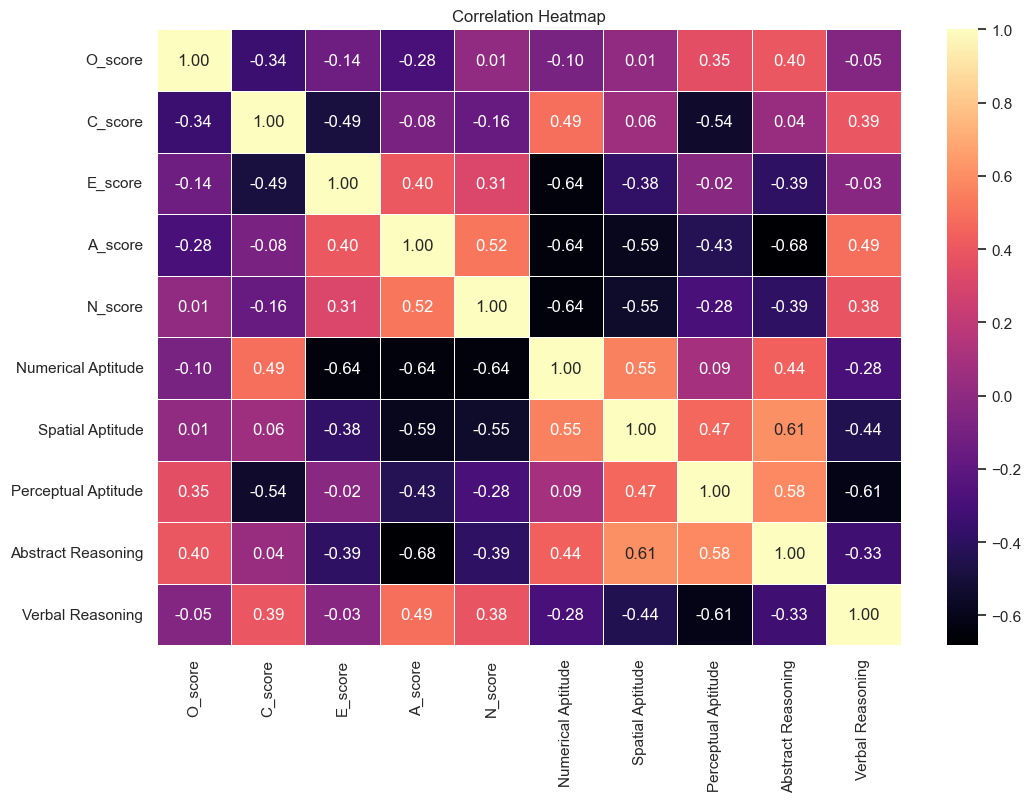

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='magma', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

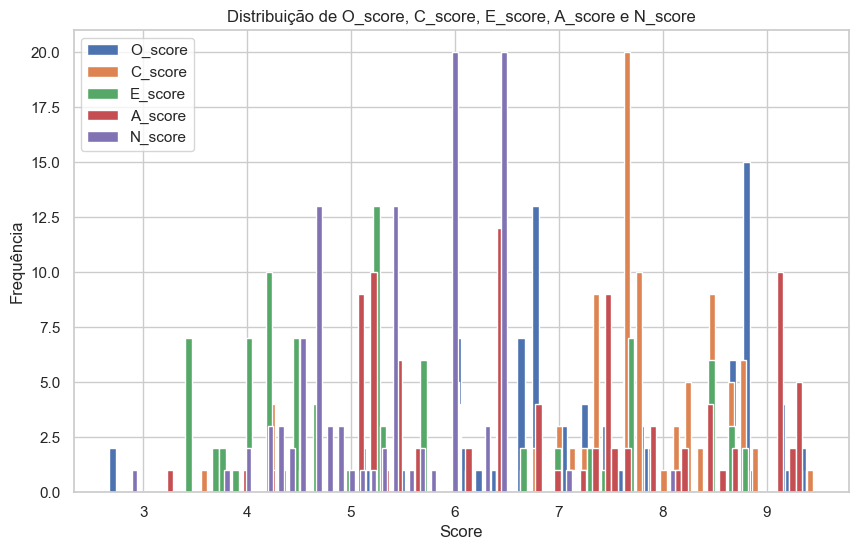

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(df['O_score'], bins=100, alpha=1.0, label='O_score')
plt.hist(df['C_score'], bins=100, alpha=1.0, label='C_score')
plt.hist(df['E_score'], bins=100, alpha=1.0, label='E_score')
plt.hist(df['A_score'], bins=100, alpha=1.0, label='A_score')
plt.hist(df['N_score'], bins=100, alpha=1.0, label='N_score')

plt.title('Distribuição de O_score, C_score, E_score, A_score e N_score')
plt.xlabel('Score')
plt.ylabel('Frequência')
plt.legend(loc='upper left')

plt.show()

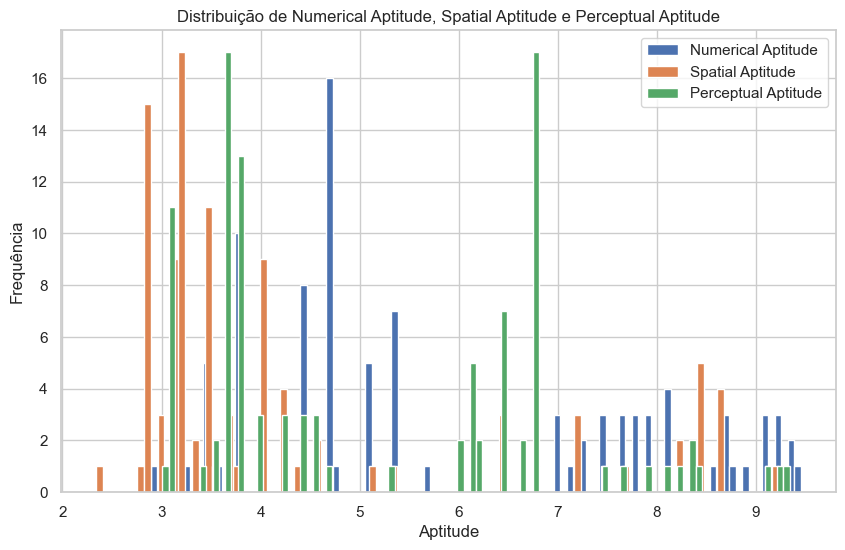

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(df['Numerical Aptitude'], bins=100, alpha=1.0, label='Numerical Aptitude')
plt.hist(df['Spatial Aptitude'], bins=100, alpha=1.0, label='Spatial Aptitude')
plt.hist(df['Perceptual Aptitude'], bins=100, alpha=1.0, label='Perceptual Aptitude')

plt.title('Distribuição de Numerical Aptitude, Spatial Aptitude e Perceptual Aptitude')
plt.xlabel('Aptitude')
plt.ylabel('Frequência')
plt.legend(loc='upper right')

plt.show()

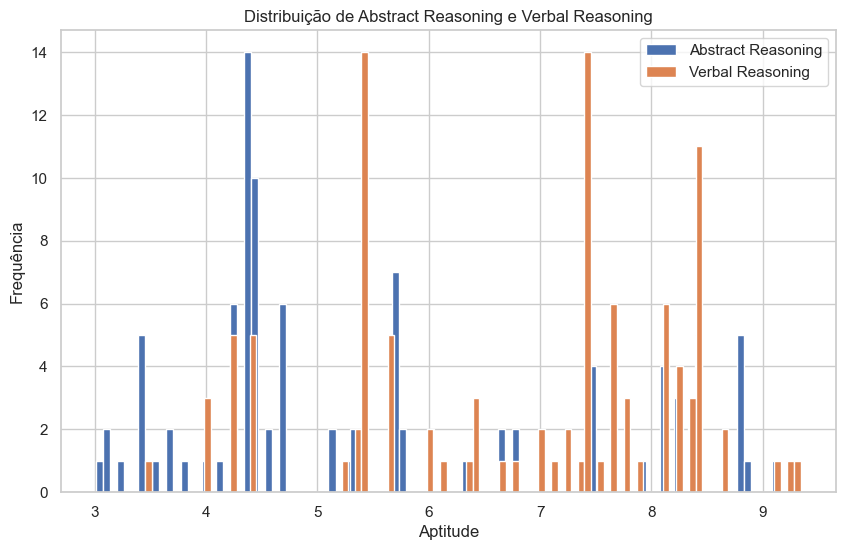

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(df['Abstract Reasoning'], bins=100, alpha=1.0, label='Abstract Reasoning')
plt.hist(df['Verbal Reasoning'], bins=100, alpha=1.0, label='Verbal Reasoning')

plt.title('Distribuição de Abstract Reasoning e Verbal Reasoning')
plt.xlabel('Aptitude')
plt.ylabel('Frequência')
plt.legend(loc='upper right')

plt.show()

<Figure size 1400x600 with 0 Axes>

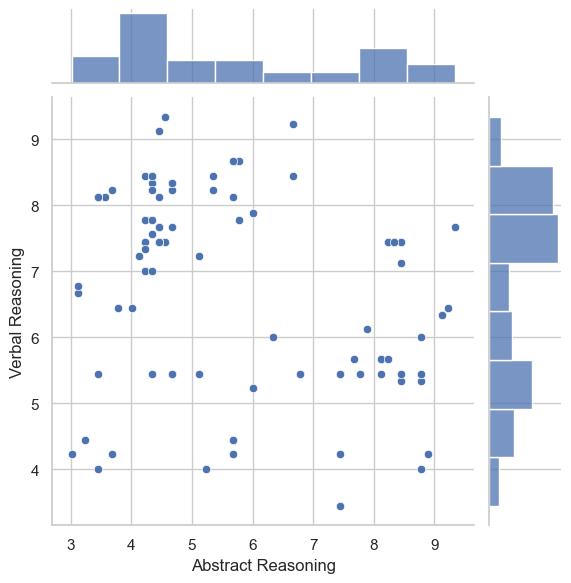

In [16]:
plt.figure(figsize=(14, 6))
sns.jointplot(data=df, x='Abstract Reasoning', y='Verbal Reasoning')

plt.xlabel('Abstract Reasoning')
plt.ylabel('Verbal Reasoning')
plt.show()

In [17]:
colunas_manter = ['O_score', 'C_score', 'E_score', 'A_score', 'N_score']
novo_df = df[colunas_manter]

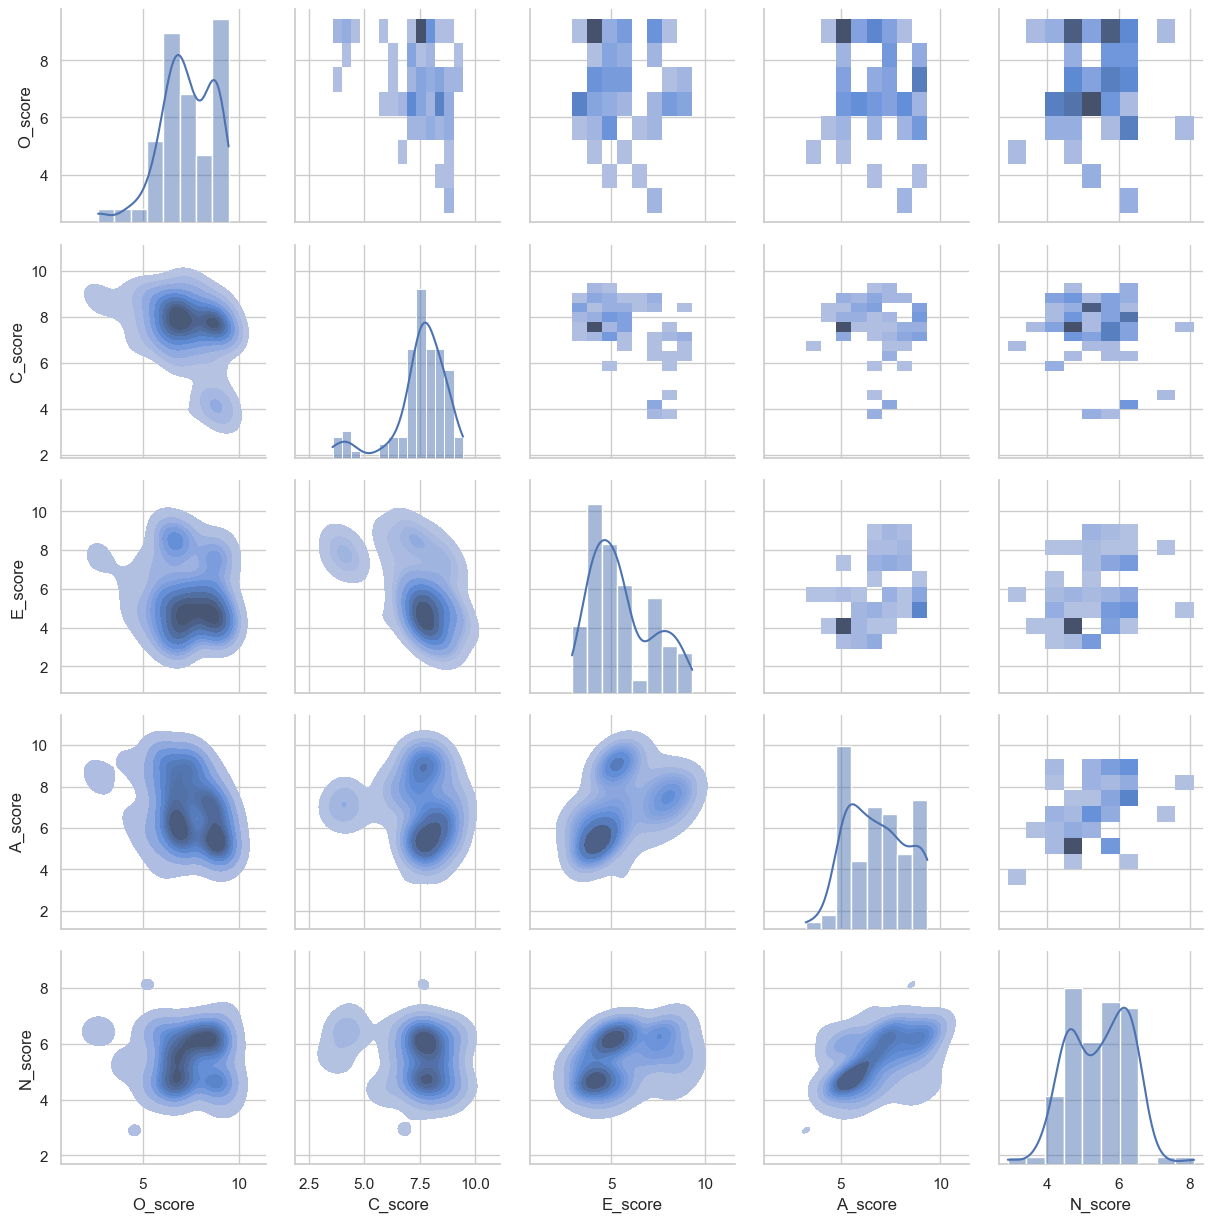

In [18]:
g = sns.PairGrid(novo_df)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

In [19]:
medias = df.groupby('Career').mean()
medias_ordenadas = medias.mean(axis=1).sort_values(ascending=False).head(20)

In [20]:
medias_ordenadas

Career
Astronomer                     6.9060
Research Scientist             6.9050
Electronics Design Engineer    6.7720
Electrical Engineer            6.7720
Aerospace Engineer             6.7610
Robotics Engineer              6.7500
Architect                      6.7170
Salesperson                    6.6840
Software Developer             6.6720
Tax Accountant                 6.5610
Airline Pilot                  6.5160
Game Developer                 6.4950
Geologist                      6.4950
Mechanical Designer            6.4830
Psychologist                   6.4730
Environmental Scientist        6.4505
Civil Engineer                 6.4390
Air Traffic Controller         6.4380
Mechanical Engineer            6.4380
Forensic Scientist             6.4280
dtype: float64

In [21]:
medias['medias_finais'] = medias.mean(axis=1)
medias_grid = medias.sort_values(by='medias_finais', ascending=False).head(20)

In [22]:
medias_grid

,O_score,C_score,E_score,A_score,N_score,Numerical Aptitude,Spatial Aptitude,Perceptual Aptitude,Abstract Reasoning,Verbal Reasoning,medias_finais
Career,,,,,,,,,,,
Astronomer,9.450,8.010,4.67,5.56,4.010,7.78,7.45,6.67,9.12,6.34,6.9060
Research Scientist,9.120,8.780,4.23,5.67,4.560,7.89,5.34,6.45,9.34,7.67,6.9050
Electronics Design Engineer,7.340,7.670,4.23,5.45,4.890,9.12,8.67,6.45,8.23,5.67,6.7720
Electrical Engineer,7.230,7.670,4.23,5.45,4.890,9.34,8.67,6.45,8.12,5.67,6.7720
Aerospace Engineer,7.230,7.670,4.23,5.45,4.890,9.23,8.67,6.45,8.12,5.67,6.7610
Robotics Engineer,7.340,7.670,4.23,5.23,4.670,9.34,8.45,6.78,8.12,5.67,6.7500
Architect,8.450,7.010,5.34,5.45,4.560,6.45,9.12,7.67,8.89,4.23,6.7170
Salesperson,6.120,6.780,9.34,7.56,5.010,6.23,4.23,6.45,6.67,8.45,6.6840
Software Developer,8.780,7.890,5.67,6.01,4.670,8.45,4.23,5.34,9.23,6.45,6.6720


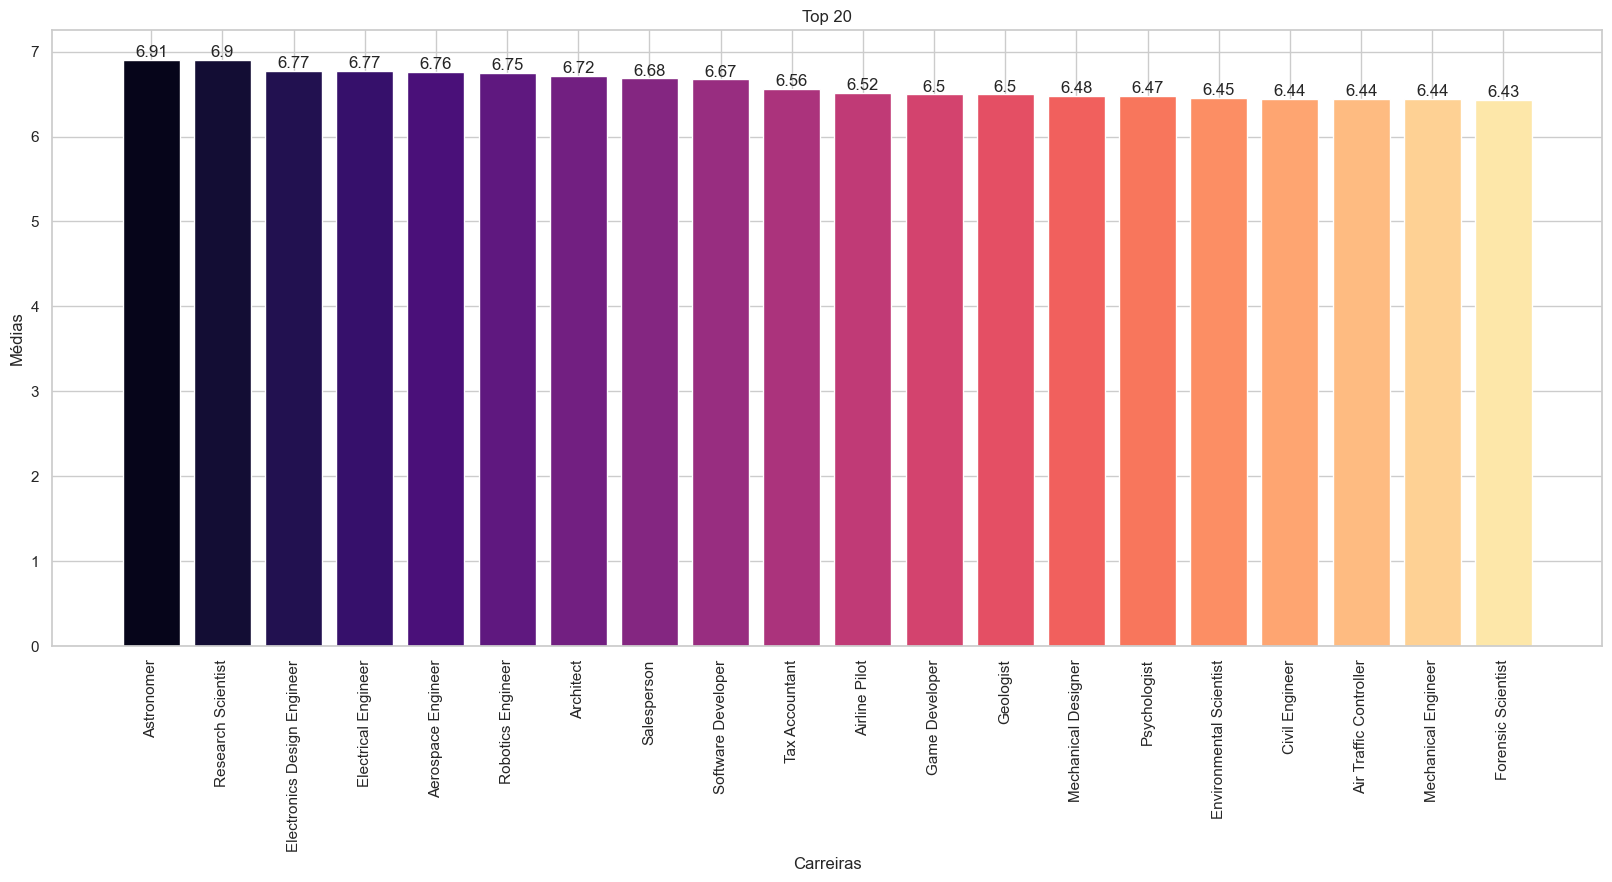

In [23]:
plt.figure(figsize=(20, 8))
colors = sns.color_palette("magma", len(medias_grid))

barras = plt.bar(medias_grid.index, medias_grid['medias_finais'], color=colors)

for bar in barras:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.xlabel('Carreiras')
plt.ylabel('Médias')
plt.title('Top 20')
plt.xticks(rotation=90)
plt.show()

In [25]:
X = df.drop(columns=['Career'])
y = df['Career']

In [26]:
scaler = StandardScaler()

In [27]:
X_scaled = scaler.fit_transform(X)

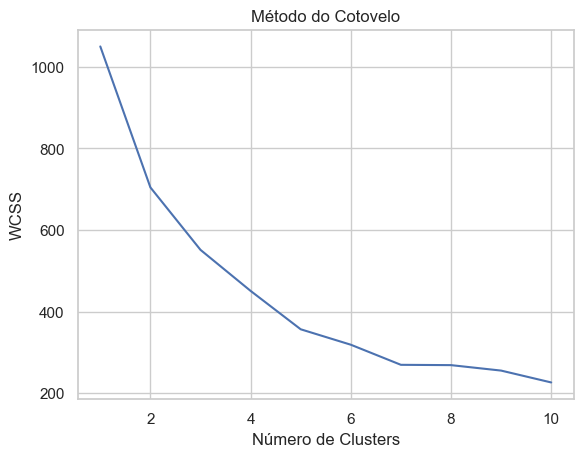

In [28]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=101)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

In [29]:
kmeans = KMeans(n_clusters=5, random_state=101)
clusters = kmeans.fit_predict(X_scaled)

In [30]:
df['Cluster'] = clusters

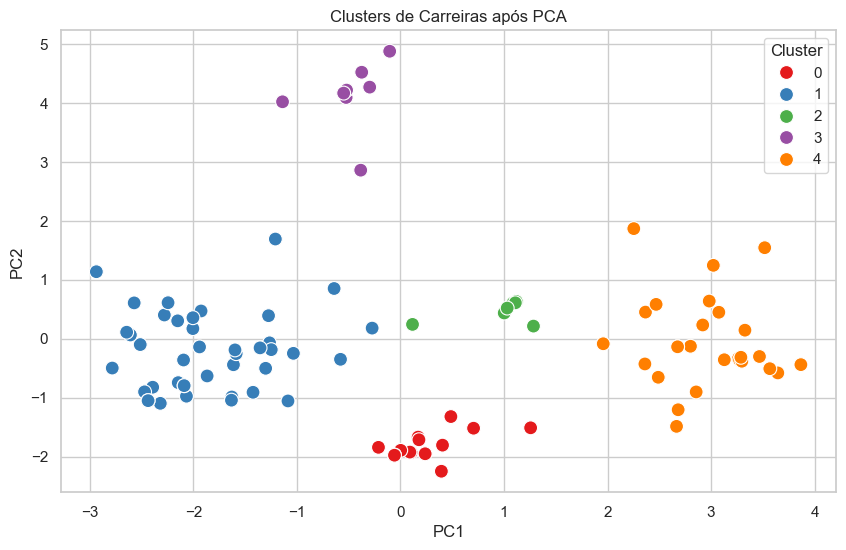

In [34]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
df['PC1'] = principal_components[:, 0]
df['PC2'] = principal_components[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster', palette='Set1', s=100)
plt.title('Clusters de Carreiras após PCA')
plt.show()

In [39]:
del df['PC1']
del df['PC2']

In [41]:
df.head()

,O_score,C_score,E_score,A_score,N_score,Numerical Aptitude,Spatial Aptitude,Perceptual Aptitude,Abstract Reasoning,Verbal Reasoning,Career,Cluster
0,5.45,8.67,3.45,5.34,4.23,9.23,4.56,6.78,7.89,6.12,Accountant,4
1,8.78,5.67,4.56,6.45,4.23,5.12,8.45,7.89,6.34,6.01,Graphic Designer,4
2,6.12,6.78,9.34,7.56,5.01,6.23,4.23,6.45,6.67,8.45,Salesperson,1
3,9.12,8.78,4.23,5.67,4.56,7.89,5.34,6.45,9.34,7.67,Research Scientist,4
4,6.45,7.56,5.67,9.12,4.23,5.34,4.01,6.23,5.78,8.67,Teacher,1


In [42]:
df['sum'] = df.iloc[:, :-2].sum(axis=1)

In [44]:
media_cluster = df.groupby('Cluster')['sum'].mean()
media_cluster

Cluster
0    57.959333
1    59.342609
2    63.406250
3    58.685556
4    64.446296
Name: sum, dtype: float64

In [51]:
df[df['Cluster'] == 4]

,O_score,C_score,E_score,A_score,N_score,Numerical Aptitude,Spatial Aptitude,Perceptual Aptitude,Abstract Reasoning,Verbal Reasoning,Career,Cluster,sum
0,5.45,8.67,3.45,5.34,4.23,9.23,4.56,6.78,7.89,6.12,Accountant,4,61.72
1,8.78,5.67,4.56,6.45,4.23,5.12,8.45,7.89,6.34,6.01,Graphic Designer,4,63.50
3,9.12,8.78,4.23,5.67,4.56,7.89,5.34,6.45,9.34,7.67,Research Scientist,4,69.05
5,8.45,7.01,5.34,5.45,4.56,6.45,9.12,7.67,8.89,4.23,Architect,4,67.17
7,8.78,7.89,5.67,6.01,4.67,8.45,4.23,5.34,9.23,6.45,Software Developer,4,66.72
14,4.56,6.78,5.67,3.23,2.89,8.12,8.67,4.01,7.45,3.45,Construction Engineer,4,54.83
16,9.45,8.01,4.67,5.56,4.01,7.78,7.45,6.67,9.12,6.34,Astronomer,4,69.06
21,9.12,7.45,4.23,5.67,3.78,7.01,6.45,6.78,8.78,6.01,Environmental Scientist,4,65.28
26,7.89,7.67,4.01,5.23,4.56,9.45,3.45,6.78,8.78,5.34,Biomedical Engineer,4,63.16
32,8.78,7.67,4.01,5.23,4.56,7.12,3.45,6.78,8.45,5.34,Biotechnologist,4,61.39


In [52]:
df[df['Cluster'] == 0]

,O_score,C_score,E_score,A_score,N_score,Numerical Aptitude,Spatial Aptitude,Perceptual Aptitude,Abstract Reasoning,Verbal Reasoning,Career,Cluster,sum
17,6.78,8.67,5.23,6.45,4.01,9.12,2.89,3.56,3.23,4.45,Financial Analyst,0,54.39
23,6.34,8.12,2.89,6.78,4.78,7.45,3.23,3.56,4.23,7.01,IT Support Specialist,0,54.39
28,6.67,8.23,5.12,6.01,4.45,9.12,3.34,3.78,4.23,7.45,Data Analyst,0,58.40
29,7.12,9.45,4.23,6.78,4.56,8.67,3.23,3.67,4.01,6.45,Pharmacist,0,58.17
31,5.67,8.78,6.67,6.34,4.34,9.23,3.01,3.78,3.45,4.01,Financial Planner,0,55.28
34,6.78,8.45,5.12,6.01,4.56,7.89,3.45,3.67,4.23,7.34,Software Quality Assurance Tester,0,57.50
38,6.78,8.67,4.45,6.01,4.78,8.34,3.23,3.67,4.12,7.23,Financial Auditor,0,57.28
53,6.67,7.78,3.45,6.01,5.45,8.67,3.12,3.78,4.45,7.45,Financial Advisor,0,56.83
54,4.34,8.89,4.78,6.45,5.45,7.67,8.45,6.78,5.12,7.23,Airline Pilot,0,65.16
60,6.67,8.45,3.45,6.12,5.23,7.78,3.12,3.78,4.45,7.45,Marketing Analyst,0,56.50


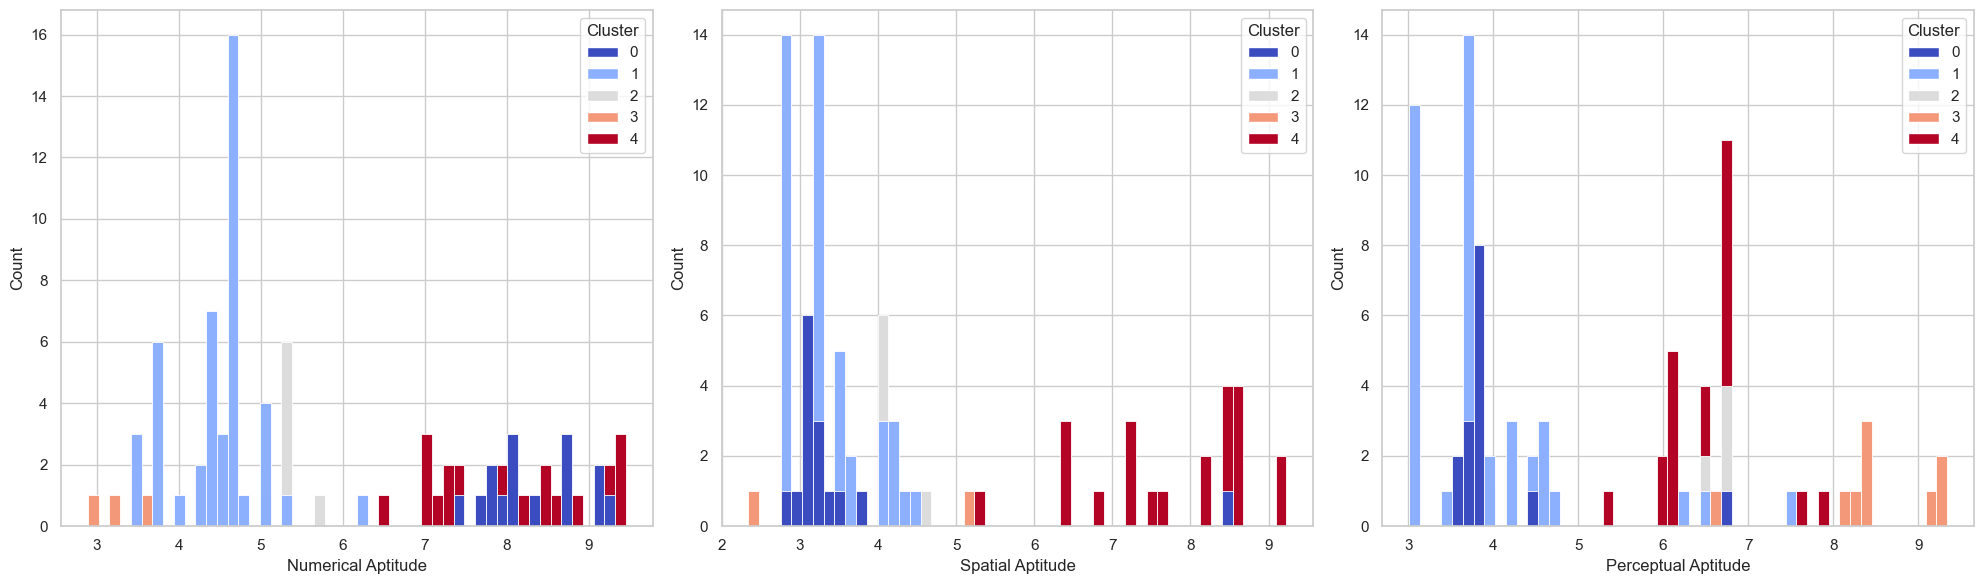

In [82]:
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(20, 6))

sns.histplot(media_cluster, x='Numerical Aptitude', bins=50, hue='Cluster', palette='coolwarm', alpha=1.0, ax=axs[0])
sns.histplot(media_cluster, x='Spatial Aptitude', bins=50, hue='Cluster', palette='coolwarm', alpha=1.0, ax=axs[1])
sns.histplot(media_cluster, x='Perceptual Aptitude', bins=50, hue='Cluster', palette='coolwarm', alpha=1.0, ax=axs[2])

plt.tight_layout()
plt.show()

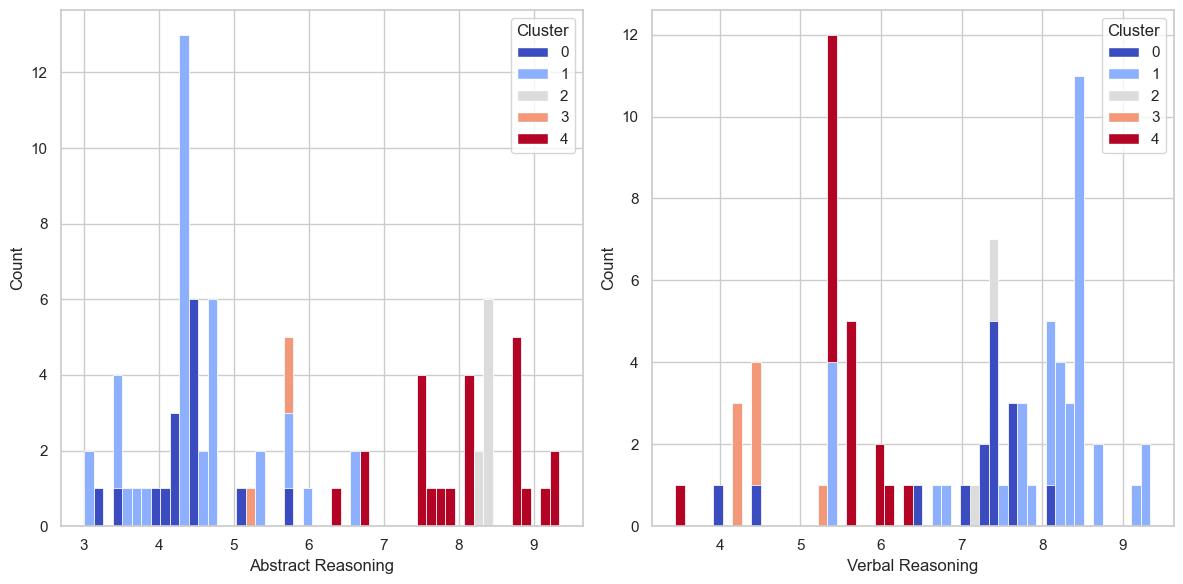

In [85]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12, 6))

sns.histplot(media_cluster, x='Abstract Reasoning', bins=50, hue='Cluster', palette='coolwarm', alpha=1.0, ax=axs[0])
sns.histplot(media_cluster, x='Verbal Reasoning', bins=50, hue='Cluster', palette='coolwarm', alpha=1.0, ax=axs[1])

plt.tight_layout()
plt.show()

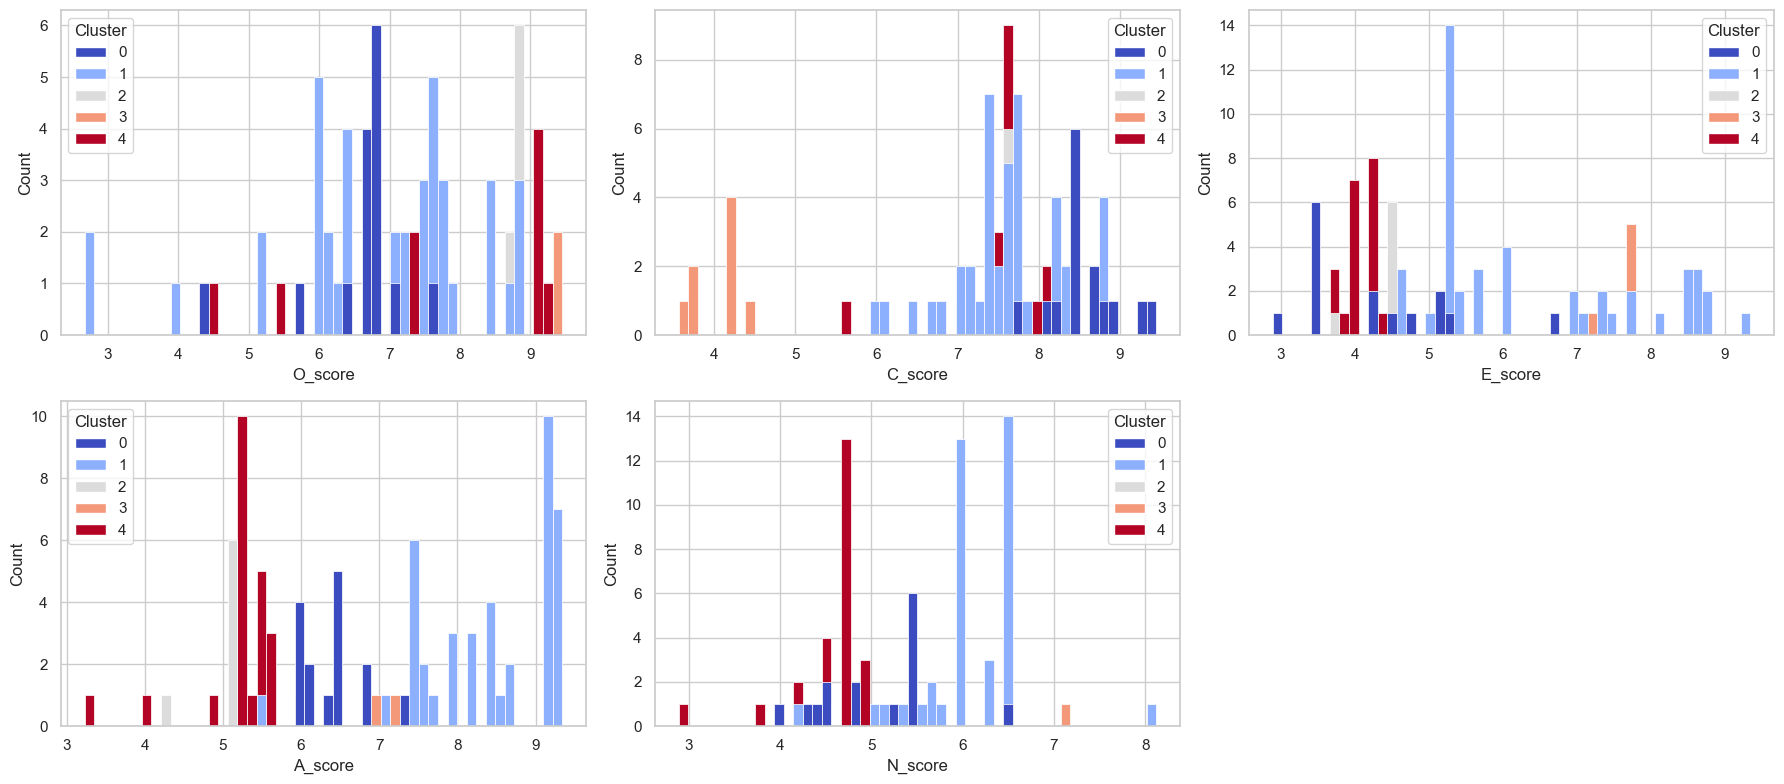

In [91]:
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(18, 8))

sns.histplot(media_cluster, x='O_score', bins=50, hue='Cluster', palette='coolwarm', alpha=1.0, ax=axs[0, 0])
sns.histplot(media_cluster, x='C_score', bins=50, hue='Cluster', palette='coolwarm', alpha=1.0, ax=axs[0, 1])
sns.histplot(media_cluster, x='E_score', bins=50, hue='Cluster', palette='coolwarm', alpha=1.0, ax=axs[0, 2])
sns.histplot(media_cluster, x='A_score', bins=50, hue='Cluster', palette='coolwarm', alpha=1.0, ax=axs[1, 0])
sns.histplot(media_cluster, x='N_score', bins=50, hue='Cluster', palette='coolwarm', alpha=1.0, ax=axs[1, 1])


fig.delaxes(axs[1, 2])
plt.tight_layout()
plt.show()